<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%8B%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D0%BE%D0%B9_%D0%BA%D0%B0%D1%80%D1%82%D1%8B_%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
!wget -O AER_credit_card_data.csv https://raw.githubusercontent.com/SedyaPrograms/Tutorial/main/AI%20and%20machine%20learning/dataset/AER_credit_card_data.csv

--2023-04-06 14:27:17--  https://raw.githubusercontent.com/SedyaPrograms/Tutorial/main/AI%20and%20machine%20learning/dataset/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.007s  

2023-04-06 14:27:17 (9.48 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



In [55]:
df = pd.read_csv('AER_credit_card_data.csv')


# Посмотреть на данные (Визуализация)
# Препроцессинг данных (обработка)
# Разделение на тренировочную и тестовую выборки
# Обучение модели 
# Проверка метрик на тестовой выборке

In [54]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

"карточка", "отчеты", "возраст", "доход", "доля", "расходы", "владелец",
"самостоятельная оплата", "иждивенцы", "месяцы", "основные карточки", "активные"

In [56]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [57]:
Yes_or_No = df['card']

In [210]:
cards_result = []
for i in range(len(Yes_or_No)):
  if Yes_or_No[i] == 'yes':
    cards_result.append(1)
  else: cards_result.append(0)

In [211]:
cards_result= np.array(cards_result)

In [212]:
cards_result

array([1, 1, 1, ..., 1, 1, 1])

In [184]:
fithers = df.to_numpy()

In [142]:
fithers 

array([['yes', 0, 37.66667, ..., 54, 1, 12],
       ['yes', 0, 33.25, ..., 34, 1, 13],
       ['yes', 0, 33.66667, ..., 58, 1, 5],
       ...,
       ['yes', 0, 40.58333, ..., 1, 1, 2],
       ['yes', 0, 32.83333, ..., 60, 1, 7],
       ['yes', 0, 48.25, ..., 2, 1, 0]], dtype=object)

In [201]:
fithers = np.delete(fithers, 0 ,axis=1)
fithers
fithers[fithers == 'yes' ] = 1.0
fithers[fithers == 'no' ] = 0.0

<ipython-input-201-f4e92d30c689>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  fithers[fithers == 'yes' ] = 1.0
<ipython-input-201-f4e92d30c689>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  fithers[fithers == 'no' ] = 0.0


In [202]:
fithers = fithers.tolist()
for i in range(len(fithers)):
  fithers[i] = list(map(float, fithers[i]))



In [203]:
fithers  = np.array(fithers)

In [192]:
type(fithers)

numpy.ndarray

In [193]:
type(fithers[i])

numpy.ndarray

разделил результат (cards_result) от фич (fithers)

теперь надо разделить на тренировочные и тестовые данные

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fithers, cards_result,
                                                    test_size=0.2)

In [208]:
type(y_train[0])

float

In [207]:
type(X_train)

numpy.ndarray

In [209]:
X_train.shape, X_test.shape 

((1055, 11), (264, 11))

из 5-го колаба

In [90]:
from sklearn.metrics import accuracy_score

def sigmoid(x, w):
       return (1.0 / (1 + np.exp(- x @ w ))).reshape(-1)

def loss(x, y_true, w):
    n = len(y_true)

    sigmoid_result = sigmoid(x, w)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1 - y_true) * np.log(1 - sigmoid_result)

    assert y_true.shape == zero_class.shape, '{} != {}'.format(y_true.shape, zero_class.shape)
    assert y_true.shape == one_class.shape, '{} != {}'.format(y_true.shape, one_class.shape)

    logloss = np.sum(zero_class + one_class) / n
    return -logloss


# на входе: x_shape: [n_samples, n_features +1]
# на выходе: [grad_w0, grad_w1,..., grad_w_(n_features)] | out_shape: (n_features +1) 
# для этого
# (n_features +1,m) х (m,1) = (n_features +1) 
# под m у нас?
# (y_true - sigmoid_result) размерности (n_samples,1)
# мы делали (1, n_samples) х (n_samples, n_features) = (n_features +1)
# получается, что мб m = n_samples   
def loss_grad(x, y_true, w):
    n = len(y_true)
    sigmoid_result = sigmoid(x, w)

    grad = (x.T @  -(y_true - sigmoid_result)) / n 
    # grad *= 2 * alpha * ()

    return grad

# Функция делает сравнение sigmoid(x, w) > 0.5, если True, то берет первое занчение(1), иначе - второе (0)
def prediction(x, w): 
    return np.where(sigmoid(x, w) > 0.5, 1, 0)

def gradient_descent(X_train, y_train, X_test, y_test, epochs=10, lr=0.001): # изменили количество аргументов 
    _, n_features = X_train.shape
    w = np.zeros((n_features + 1))

# см выше пример
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    loss_train = [loss(X_train, y_train, w)]
    loss_test = [loss(X_test, y_test, w)]

    accuracy_test = [accuracy_score(y_test, prediction(X_test, w))] # смотрим accuracy на каждом шагу

    epoch = 0
    while epoch < epochs:

        grad = loss_grad(X_train, y_train, w) 

        loss_train.append(loss(X_train, y_train, w))
        loss_test.append(loss(X_test, y_test, w))

        # добавили accuracy
        accuracy_test.append(accuracy_score(y_test, prediction(X_test, w)))
        w -= lr * grad


        epoch += 1
    return w, loss_train, loss_test, accuracy_test

In [232]:
w, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=10000)

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: divide by zero encountered in log
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: invalid value encountered in multiply
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: divide by zero encountered in log
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: invalid value encountered in multiply
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: divide by zero encountered in log
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: invalid value encountered in multiply
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
<ipython-input-90-bb4bbe99e5e4>:11: RuntimeWarning: divide by zero e

Text(0, 0.5, 'Loss')

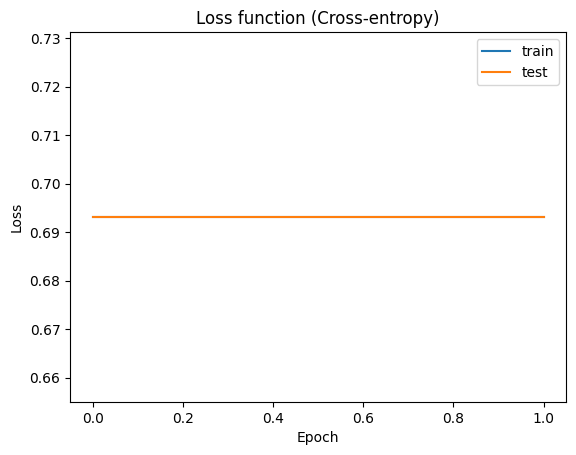

In [233]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

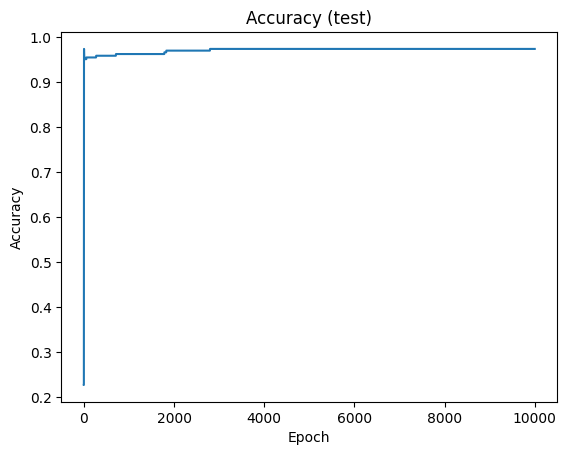

In [234]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [235]:
X_test_stacked = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [236]:
pred = prediction(X_test_stacked, w)

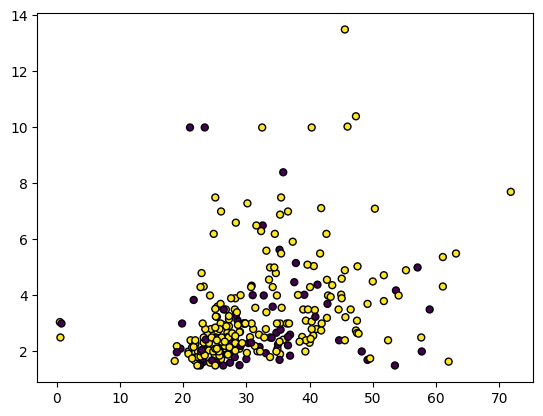

In [239]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=pred, s=25, edgecolor="k")

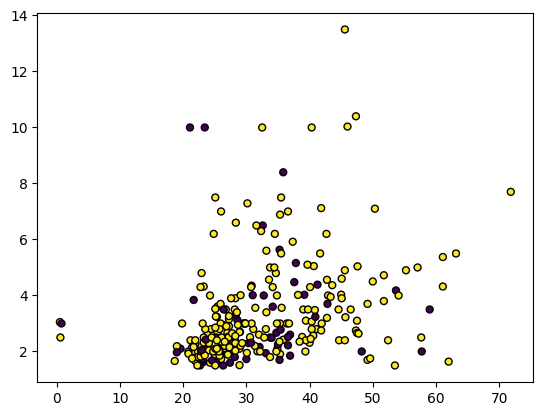

In [243]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")